## IDS/ACM/CS 158: Fundamentals of Statistical Learning
### PS1, Problem 5: Training vs Testing Error and the Bias-Variance Trade-Off
> Name: Li, Michael
 
> Email address: mlli@caltech.edu

Notes:
Please use python 3.6

You are required to properly comment and organize your code.

* Helper functions (add/remove part label according to the specific question requirements)

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

%matplotlib inline

def generate_data(N):
    """
    N - number of observations to generate
    
    Returns dataset of size N according to problem statement
    """
    x = np.random.normal(size=(N, 3))
    y = np.array([np.sin(i[0]) + np.exp(i[1])+np.log(np.abs(i[2]))+np.random.normal() for i in x])[...,None]
    return np.concatenate((x,y), axis=1)

def average_error(ys, y_preds):
    """
    ys - vector of real outputs
    y_preds - vector of predicted outputs
    
    Returns L2 loss between vectors
    """
    return np.mean((ys - y_preds)**2)

def knn_regression(K, D, X):
    """
    K - number of neighbors
    D - training data consisting of pairs of p-dimensional vectors and outputs
    X - a column p-vector that represents a new input
    
    Returns the K-NN regression of X using D
    """
    train_x = D[:,:-1]
    train_y = D[:,-1]
    
    # find distances to X and sort points in D by that
    dists = np.sqrt(np.sum((train_x - np.matlib.repmat(X, len(train_x), 1))**2, axis=1))
    inds = dists.argsort()
    
    # return the mean of the outputs of the first K observations
    return np.mean(train_y[inds][:K])

* <b>Part A</b>

In [8]:
N = K = 10**3
train_data = generate_data(N)
test_data = generate_data(N)

train_err = []
test_err = []

for k in range(1, K+1):
    # run knn on all training and test inputs for specified k
    train_knn = [knn_regression(k, train_data, train_data[i][:-1]) for i in range(len(train_data))]
    test_knn = [knn_regression(k, train_data, test_data[i][:-1]) for i in range(len(test_data))]
    
    # calculate L2 Loss of training and testing predictions
    train_err.append(average_error(train_data[:,-1], train_knn))
    test_err.append(average_error(test_data[:,-1], test_knn))

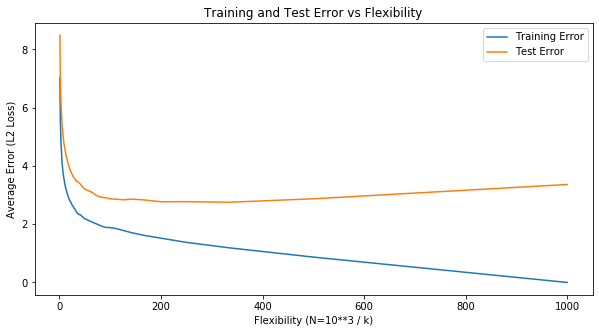

In [9]:
dims = np.arange(1, K+1)
x = [N/k for k in dims]

plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(x, train_err, label='Training Error')
plt.plot(x, test_err, label='Test Error')
plt.xlabel('Flexibility (N=10**3 / k)')
plt.ylabel('Average Error (L2 Loss)')
plt.title('Training and Test Error vs Flexibility')
plt.legend()
plt.show()

* <b>Part B</b>

In [40]:
T = 10**3
K = N = 10**2
tot_err = []
tot_bias = []
tot_var = []

# generate training data
train_data = [generate_data(N) for _ in range(T)]

# generate new input
test_data = np.random.normal(size=3)
f_x = np.sin(test_data[0]) + np.exp(test_data[1])+np.log(np.abs(test_data[2]))

for k in range(1, K+1):
    # run KNN on new input using all datasets
    knn = [knn_regression(k, d, test_data) for d in train_data]
    
    # create noise and evaluate error
    noise = np.random.normal(size=T)
    errs = (np.tile(f_x, len(knn)) + noise - knn)**2
    
    # find average prediction amongst training datasets
    avg_pred = np.mean(knn)
    
    # calculate squared bias and variance
    bias = (f_x - avg_pred)**2
    var = (knn - np.tile(avg_pred, len(knn)))**2
    
    tot_err.append(np.mean(errs))
    tot_bias.append(bias)
    tot_var.append(np.mean(var))

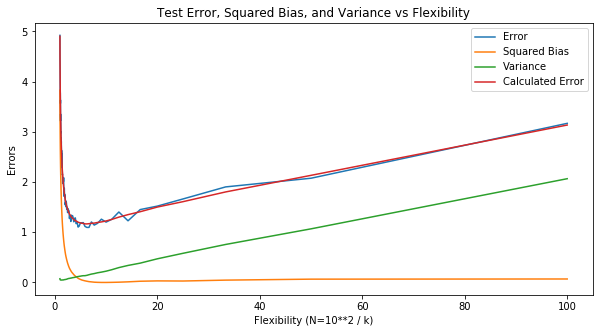

In [41]:
dims = np.arange(1, K+1)
x = [N/k for k in dims]
calc_err = [1+tot_bias[i]+tot_var[i] for i in range(len(tot_bias))]

plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(x, tot_err, label='Error')
plt.plot(x, tot_bias, label='Squared Bias')
plt.plot(x, tot_var, label='Variance')
plt.plot(x, calc_err, label='Calculated Error')
plt.xlabel('Flexibility (N=10**2 / k)')
plt.ylabel('Errors')
plt.title('Test Error, Squared Bias, and Variance vs Flexibility')
plt.legend()
plt.show()